# Assignment 4

This is an basecode for assignment 4 of Artificial Intelligence class (CSCE-4613), Spring 2023


In [1]:
import torch
import torch.nn as nn
import torchvision
import matplotlib.pyplot as plt

## Binary Network

## Define a binary network class


In [47]:
class BinaryNetwork(nn.Module):
  def __init__(self, hidden_dims = [4]):
    super(BinaryNetwork, self).__init__()
    self.network_dims = [2] + hidden_dims + [1]
    self.layers = [] 
    for i, dim in enumerate(self.network_dims[1:]):
      prev_dim = self.network_dims[i]
      dense = nn.Linear(in_features = prev_dim, out_features = dim, bias = True)
      activation = nn.Sigmoid()
      self.layers += [dense, activation]
    self.layers = nn.ModuleList(self.layers)

  def forward(self, x):
    for layer in self.layers:
      x = layer(x)
    return x

### Define data generator

In [48]:
def generate_data(operator = "AND"):
  assert operator in ["AND", "OR", "XOR", "NOR"], "%s operator is not valid" % operator
  data = []
  label = [] 
  for i in range(2):
    for j in range(2):
      data.append([i, j])
      if operator == "AND":
        label.append(i & j)
      elif operator == "OR":
        label.append(i | j)
      elif operator == "XOR":
        label.append(i ^ j)
      else:
        label.append(not (i | j))
  data = torch.as_tensor(data, dtype = torch.float32)
  label = torch.as_tensor(label, dtype = torch.float32)
  return data, label

### Define the training framework

BinaryNetwork(
  (layers): ModuleList(
    (0): Linear(in_features=2, out_features=1, bias=True)
    (1): Sigmoid()
  )
)
[5/50]. Loss: 0.6164. Accuracy: 75.00
[10/50]. Loss: 0.3801. Accuracy: 75.00
[15/50]. Loss: 0.2417. Accuracy: 100.00
[20/50]. Loss: 0.1535. Accuracy: 100.00
[25/50]. Loss: 0.1141. Accuracy: 100.00
[30/50]. Loss: 0.0862. Accuracy: 100.00
[35/50]. Loss: 0.0716. Accuracy: 100.00
[40/50]. Loss: 0.0606. Accuracy: 100.00
[45/50]. Loss: 0.0533. Accuracy: 100.00
[50/50]. Loss: 0.0480. Accuracy: 100.00
Final Accuracy: 100.00


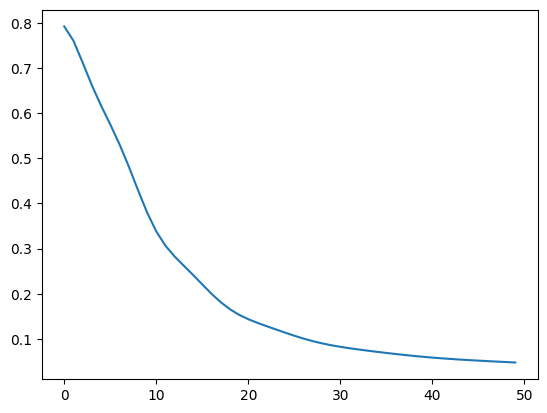

In [83]:
model = BinaryNetwork( hidden_dims= [])
model.train()
print(model)
operator = "AND" 
inputs, labels = generate_data(operator = operator)
n_iters = 50
learning_rate = 0.5
bce_loss_fn = nn.BCELoss()
optim = torch.optim.SGD(params = model.parameters(), lr = learning_rate, momentum=0.9)
threshold = 0.5
losses = []
for i in range(1, n_iters + 1):
  outputs = model(inputs)
  outputs = outputs.reshape(-1)
  
  loss = bce_loss_fn(outputs, labels)
  predictions = (outputs > threshold).long()
  
  accuracy = (predictions == labels).float().mean() * 100.

  optim.zero_grad()
  loss.backward()
  optim.step()

  loss = loss.item() # Convert to Python Scalar
  accuracy = accuracy.item() # Convert to Python Scalar
  losses.append(loss)
  
  if i % 5 == 0:
    print("[%d/%d]. Loss: %0.4f. Accuracy: %0.2f" % (i, n_iters, loss, accuracy))

model.eval()
outputs = model(inputs)
outputs = outputs.reshape(-1)
predictions = (outputs > threshold).long()  
accuracy = (predictions == labels).float().mean() * 100.
accuracy = accuracy.item()
print("Final Accuracy: %0.2f" % (accuracy))
plt.plot(losses)

torch.save(model.state_dict(), "%s_Network.pth" % operator)
  # model.load_state_dict(torch.load("%s_Network.pth" % operator)) # Load model in the next time you use

BinaryNetwork(
  (layers): ModuleList(
    (0): Linear(in_features=2, out_features=1, bias=True)
    (1): Sigmoid()
  )
)
[5/50]. Loss: 0.3738. Accuracy: 75.00
[10/50]. Loss: 0.2920. Accuracy: 75.00
[15/50]. Loss: 0.1474. Accuracy: 100.00
[20/50]. Loss: 0.0984. Accuracy: 100.00
[25/50]. Loss: 0.0732. Accuracy: 100.00
[30/50]. Loss: 0.0495. Accuracy: 100.00
[35/50]. Loss: 0.0381. Accuracy: 100.00
[40/50]. Loss: 0.0326. Accuracy: 100.00
[45/50]. Loss: 0.0286. Accuracy: 100.00
[50/50]. Loss: 0.0253. Accuracy: 100.00
Final Accuracy: 100.00


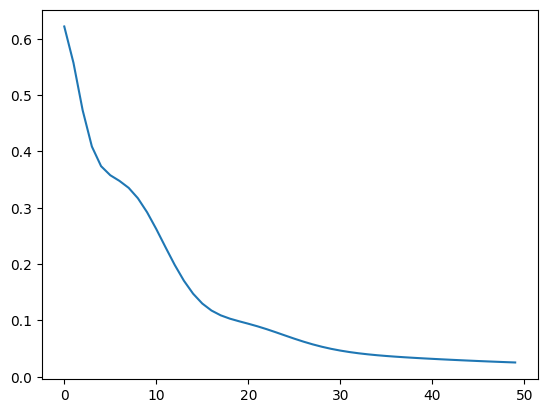

In [71]:
model = BinaryNetwork( hidden_dims= [])
model.train()
print(model)
operator = "OR" 
inputs, labels = generate_data(operator = operator)
n_iters = 50
learning_rate = 0.5
bce_loss_fn = nn.BCELoss()
optim = torch.optim.SGD(params = model.parameters(), lr = learning_rate, momentum=0.9)
threshold = 0.5
losses = []
for i in range(1, n_iters + 1):
  outputs = model(inputs)
  outputs = outputs.reshape(-1)
  
  loss = bce_loss_fn(outputs, labels)
  predictions = (outputs > threshold).long()
  
  accuracy = (predictions == labels).float().mean() * 100.

  optim.zero_grad()
  loss.backward()
  optim.step()

  loss = loss.item() # Convert to Python Scalar
  accuracy = accuracy.item() # Convert to Python Scalar
  losses.append(loss)
  
  if i % 5 == 0:
    print("[%d/%d]. Loss: %0.4f. Accuracy: %0.2f" % (i, n_iters, loss, accuracy))

model.eval()
outputs = model(inputs)
outputs = outputs.reshape(-1)
predictions = (outputs > threshold).long()  
accuracy = (predictions == labels).float().mean() * 100.
accuracy = accuracy.item()
print("Final Accuracy: %0.2f" % (accuracy))
plt.plot(losses)

torch.save(model.state_dict(), "%s_Network.pth" % operator)
  # model.load_state_dict(torch.load("%s_Network.pth" % operator)) # Load model in the next time you use

BinaryNetwork(
  (layers): ModuleList(
    (0): Linear(in_features=2, out_features=1, bias=True)
    (1): Sigmoid()
  )
)
[5/50]. Loss: 0.3715. Accuracy: 75.00
[10/50]. Loss: 0.3515. Accuracy: 75.00
[15/50]. Loss: 0.1534. Accuracy: 100.00
[20/50]. Loss: 0.0845. Accuracy: 100.00
[25/50]. Loss: 0.0745. Accuracy: 100.00
[30/50]. Loss: 0.0481. Accuracy: 100.00
[35/50]. Loss: 0.0332. Accuracy: 100.00
[40/50]. Loss: 0.0279. Accuracy: 100.00
[45/50]. Loss: 0.0252. Accuracy: 100.00
[50/50]. Loss: 0.0228. Accuracy: 100.00
Final Accuracy: 100.00


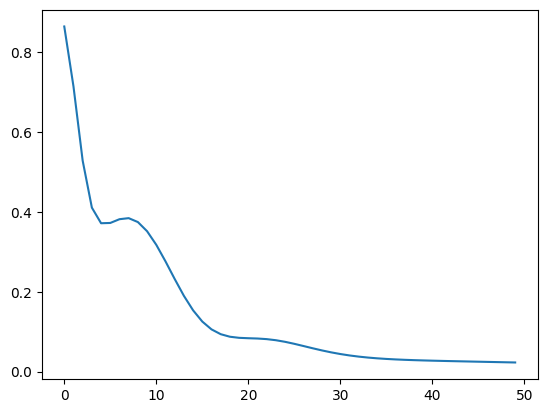

In [77]:
model = BinaryNetwork( hidden_dims= [])
model.train()
print(model)
operator = "NOR" 
inputs, labels = generate_data(operator = operator)
n_iters = 50
learning_rate = 0.5
bce_loss_fn = nn.BCELoss()
optim = torch.optim.SGD(params = model.parameters(), lr = learning_rate, momentum=0.9)
threshold = 0.5
losses = []
for i in range(1, n_iters + 1):
  outputs = model(inputs)
  outputs = outputs.reshape(-1)
  
  loss = bce_loss_fn(outputs, labels)
  predictions = (outputs > threshold).long()
  
  accuracy = (predictions == labels).float().mean() * 100.

  optim.zero_grad()
  loss.backward()
  optim.step()

  loss = loss.item() # Convert to Python Scalar
  accuracy = accuracy.item() # Convert to Python Scalar
  losses.append(loss)
  
  if i % 5 == 0:
    print("[%d/%d]. Loss: %0.4f. Accuracy: %0.2f" % (i, n_iters, loss, accuracy))

model.eval()
outputs = model(inputs)
outputs = outputs.reshape(-1)
predictions = (outputs > threshold).long()  
accuracy = (predictions == labels).float().mean() * 100.
accuracy = accuracy.item()
print("Final Accuracy: %0.2f" % (accuracy))
plt.plot(losses)

torch.save(model.state_dict(), "%s_Network.pth" % operator)
  # model.load_state_dict(torch.load("%s_Network.pth" % operator)) # Load model in the next time you use

BinaryNetwork(
  (layers): ModuleList(
    (0): Linear(in_features=2, out_features=1, bias=True)
    (1): Sigmoid()
  )
)
[5/50]. Loss: 0.7007. Accuracy: 25.00
[10/50]. Loss: 0.6954. Accuracy: 25.00
[15/50]. Loss: 0.6943. Accuracy: 50.00
[20/50]. Loss: 0.6942. Accuracy: 25.00
[25/50]. Loss: 0.6940. Accuracy: 75.00
[30/50]. Loss: 0.6937. Accuracy: 75.00
[35/50]. Loss: 0.6934. Accuracy: 25.00
[40/50]. Loss: 0.6932. Accuracy: 75.00
[45/50]. Loss: 0.6932. Accuracy: 25.00
[50/50]. Loss: 0.6932. Accuracy: 25.00
Final Accuracy: 25.00


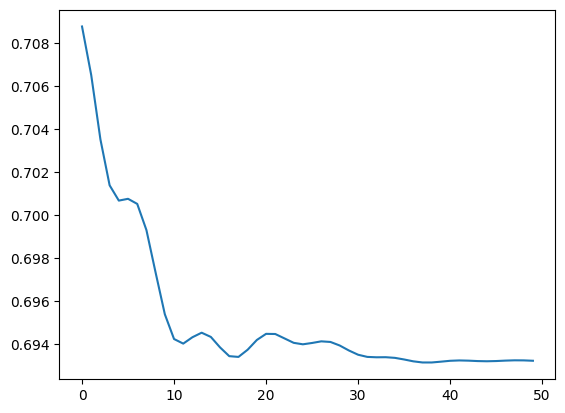

In [84]:
model = BinaryNetwork( hidden_dims= [])
model.train()
print(model)
operator = "XOR" 
inputs, labels = generate_data(operator = operator)
n_iters = 50
learning_rate = 0.5
bce_loss_fn = nn.BCELoss()
optim = torch.optim.SGD(params = model.parameters(), lr = learning_rate, momentum=0.9)
threshold = 0.5
losses = []
for i in range(1, n_iters + 1):
  outputs = model(inputs)
  outputs = outputs.reshape(-1)
  
  loss = bce_loss_fn(outputs, labels)
  predictions = (outputs > threshold).long()
  
  accuracy = (predictions == labels).float().mean() * 100.

  optim.zero_grad()
  loss.backward()
  optim.step()

  loss = loss.item() # Convert to Python Scalar
  accuracy = accuracy.item() # Convert to Python Scalar
  losses.append(loss)
  
  if i % 5 == 0:
    print("[%d/%d]. Loss: %0.4f. Accuracy: %0.2f" % (i, n_iters, loss, accuracy))

model.eval()
outputs = model(inputs)
outputs = outputs.reshape(-1)
predictions = (outputs > threshold).long()  
accuracy = (predictions == labels).float().mean() * 100.
accuracy = accuracy.item()
print("Final Accuracy: %0.2f" % (accuracy))
plt.plot(losses)

torch.save(model.state_dict(), "%s_Network.pth" % operator)
  # model.load_state_dict(torch.load("%s_Network.pth" % operator)) # Load model in the next time you use

## Digit Classification

### Define Digit Classification Network

In [85]:
class DigitNetwork(nn.Module):
  def __init__(self, hidden_dims = [128]):
    super(DigitNetwork, self).__init__()
    self.network_dims = [28 * 28] + hidden_dims + [10]
    self.layers = [] 
    for i, dim in enumerate(self.network_dims[1:]):
      prev_dim = self.network_dims[i]
      dense = nn.Linear(in_features = prev_dim, out_features = dim, bias = True)
      if i < len(self.network_dims[1:]) - 1:
        activation = nn.Sigmoid() # Hidden Layer 
      else:
        activation = nn.Softmax(dim=1) # Last Layer
      self.layers += [dense, activation]
    self.layers = nn.ModuleList(self.layers)

  def forward(self, x):
    size = x.size()
    x = x.reshape(size[0], -1) # Flatten images
    for layer in self.layers[:-1]:
      x = layer(x)
    if self.training == False:
      x = self.layers[-1](x) 
    return x

### Define Data Generator

In [86]:
def create_data_generator(batch_size = 32, root = "data"):
  train_dataset = torchvision.datasets.MNIST(root = root,
                                             train = True,
                                             transform = torchvision.transforms.ToTensor(),
                                             download = True)
  test_dataset = torchvision.datasets.MNIST(root = root,
                                             train = False,
                                             transform = torchvision.transforms.ToTensor(),
                                             download = True)
  train_loader = torch.utils.data.DataLoader(train_dataset,
                                             batch_size = batch_size,
                                             shuffle = True)
  test_loader = torch.utils.data.DataLoader(test_dataset,
                                             batch_size = batch_size,
                                             shuffle = False)
  return train_loader, test_loader

### Define the training framework

In [107]:
cuda = torch.cuda.is_available()
batch_size = 32
train_loader, test_loader = create_data_generator(batch_size)
model = DigitNetwork(hidden_dims=[])
print(model)
if cuda:
  model.cuda()
n_epochs = 4
learning_rate = 0.4
optim = torch.optim.SGD(params = model.parameters(), lr = learning_rate, momentum=0.9)
loss_fn = nn.CrossEntropyLoss()

model.train() 
for epoch in range(1, n_epochs + 1):
  for idx, (images, labels) in enumerate(train_loader):
    if cuda:
      images = images.cuda()
      labels = labels.cuda()
      
    outputs = model(images)

    loss = loss_fn(outputs, labels) 

    optim.zero_grad()
    loss.backward()
    optim.step() 

    predictions = torch.argmax(outputs, 1)
    accuracy = (predictions == labels).float().mean() * 100.

    loss = loss.item() # Convert to Python Scalar
    accuracy = accuracy.item() # Convert to Python Scalar

    if idx % 100 == 0:
      print("Epoch [%d/%d]. Iter [%d/%d]. Loss: %0.2f. Accuracy: %0.2f" % (epoch, n_epochs, idx + 1, len(train_loader), loss, accuracy))

torch.save(model.state_dict(), "MNIST_Network.pth")

DigitNetwork(
  (layers): ModuleList(
    (0): Linear(in_features=784, out_features=10, bias=True)
    (1): Softmax(dim=1)
  )
)
Epoch [1/4]. Iter [1/1875]. Loss: 2.42. Accuracy: 6.25
Epoch [1/4]. Iter [101/1875]. Loss: 1.07. Accuracy: 78.12
Epoch [1/4]. Iter [201/1875]. Loss: 1.33. Accuracy: 90.62
Epoch [1/4]. Iter [301/1875]. Loss: 0.77. Accuracy: 84.38
Epoch [1/4]. Iter [401/1875]. Loss: 1.21. Accuracy: 87.50
Epoch [1/4]. Iter [501/1875]. Loss: 1.53. Accuracy: 84.38
Epoch [1/4]. Iter [601/1875]. Loss: 0.20. Accuracy: 93.75
Epoch [1/4]. Iter [701/1875]. Loss: 0.72. Accuracy: 87.50
Epoch [1/4]. Iter [801/1875]. Loss: 0.54. Accuracy: 93.75
Epoch [1/4]. Iter [901/1875]. Loss: 2.53. Accuracy: 78.12
Epoch [1/4]. Iter [1001/1875]. Loss: 1.65. Accuracy: 84.38
Epoch [1/4]. Iter [1101/1875]. Loss: 1.01. Accuracy: 93.75
Epoch [1/4]. Iter [1201/1875]. Loss: 1.58. Accuracy: 84.38
Epoch [1/4]. Iter [1301/1875]. Loss: 1.21. Accuracy: 87.50
Epoch [1/4]. Iter [1401/1875]. Loss: 1.03. Accuracy: 93.75

### Define the evaluation framework

In [108]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay


Iter [1/10000]. Accuracy: 100.00
Iter [2001/10000]. Accuracy: 100.00
Iter [4001/10000]. Accuracy: 0.00
Iter [6001/10000]. Accuracy: 100.00
Iter [8001/10000]. Accuracy: 100.00
Final Accuracy: 89.38
Confusion Matrix
[[ 954    0    0    1    1    9    7    1    6    1]
 [   0 1086    3    5    0    2    4    2   33    0]
 [   7   13  840   56    8    5   24    5   69    5]
 [   5    1   17  918    1   21    4    4   32    7]
 [   1    1    6    2  883    0   18    1   18   52]
 [   9    2    0   55    8  731   22    0   60    5]
 [  12    3    6    4    9   11  909    1    3    0]
 [   2    5   28   22    9    2    0  849   12   99]
 [   4   11    7   34    8   21   13    2  868    6]
 [   8    2    0   17   33   10    1    6   32  900]]


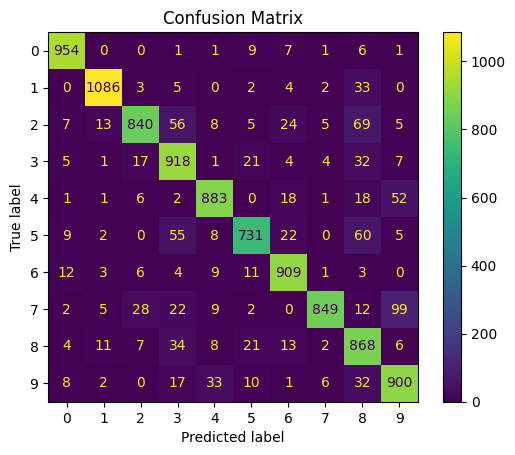

In [109]:

cuda = torch.cuda.is_available()
batch_size = 1
train_loader, test_loader = create_data_generator(batch_size)
model = DigitNetwork(hidden_dims=[])
if cuda:
  model.cuda()
model.eval()
model.load_state_dict(torch.load("MNIST_Network.pth"))

total_accuracy = 0.0 
true = []
pred = []
for idx, (images, labels) in enumerate(test_loader):
  if cuda:
    images = images.cuda()
    labels = labels.cuda()
    
  outputs = model(images)

  predictions = torch.argmax(outputs, 1)
  accuracy = (predictions == labels).float().mean() * 100.
  true.append(labels.item())
  pred.append(predictions.item())
  
  accuracy = accuracy.item() # Convert to Python Scalar

  total_accuracy += accuracy
  
  if idx % 2000 == 0:
    print("Iter [%d/%d]. Accuracy: %0.2f" % (idx + 1, len(test_loader), accuracy))

print("Final Accuracy: %0.2f" % (total_accuracy / len(test_loader)))
title = "Confusion Matrix"
disp = ConfusionMatrixDisplay.from_predictions(
  true,
  pred,
)
disp.ax_.set_title(title)
print(title)
print(disp.confusion_matrix)


## Backpropagation

### ReLU Example

In [110]:
# https://pytorch.org/tutorials/beginner/pytorch_with_examples.html#pytorch-defining-new-autograd-functions
class MyReLU(torch.autograd.Function):
    """
    We can implement our own custom autograd Functions by subclassing
    torch.autograd.Function and implementing the forward and backward passes
    which operate on Tensors.
    """

    @staticmethod
    def forward(ctx, input):
        """
        In the forward pass we receive a Tensor containing the input and return
        a Tensor containing the output. ctx is a context object that can be used
        to stash information for backward computation. You can cache arbitrary
        objects for use in the backward pass using the ctx.save_for_backward method.
        """
        ctx.save_for_backward(input)
        return input.clamp(min=0)

    @staticmethod
    def backward(ctx, grad_output):
        """
        In the backward pass we receive a Tensor containing the gradient of the loss
        with respect to the output, and we need to compute the gradient of the loss
        with respect to the input.
        """
        input, = ctx.saved_tensors
        grad_input = grad_output.clone()
        grad_input[input < 0] = 0
        return grad_input

#### Sigmoid Function


In [111]:
class MySigmoid(torch.autograd.Function):
    """
    We can implement our own custom autograd Functions by subclassing
    torch.autograd.Function and implementing the forward and backward passes
    which operate on Tensors.
    """

    @staticmethod
    def forward(ctx, input):
        # input is a N x C tensor, N is the batch size, C is the dimension of input
        ctx.save_for_backward(input)
        # YOUR CODE HERE

        return 1.0 / (1.0 + torch.exp(-input))
        
    @staticmethod
    def backward(ctx, grad_output):
        input, = ctx.saved_tensors
        # YOUR CODE HERE
        grad_input = 1.0 / (1.0 + torch.exp(-input))
        grad_input = grad_output*grad_input * (1-grad_input)

        return grad_output




#### Fully Connected Layer

In [112]:
class MyLinearFunction(torch.autograd.Function):
    """
    We can implement our own custom autograd Functions by subclassing
    torch.autograd.Function and implementing the forward and backward passes
    which operate on Tensors.
    """

    @staticmethod
    def forward(ctx, input, weights, bias):
        # input is a N x C tensor, N is the batch size, C is the dimension of input
        # weights is a C x D tensor, C and D are the dimension out input and ouput
        # bias is D tensor
        ctx.save_for_backward(input, weights, bias)
        # YOUR CODE HERE
        # return output of linear function
        return (torch.matmul(input, weights) + bias)
        

    @staticmethod
    def backward(ctx, grad_output):
        input, weights, bias = ctx.saved_tensors
        # YOUR CODE HERE
        grad_input = torch.matmul(grad_output, weights.t())
        grad_weights = torch.matmul(input.t(), grad_output)
        grad_bias = torch.sum(grad_output, axis = 0)
        
        return grad_input, grad_weights, grad_bias

class MyLinearLayer(nn.Module):
  # You don't modify this layer
  def __init__(self, in_features = 2, out_features = 4):
    super(MyLinearLayer, self).__init__()
    self.weights = nn.Parameter(torch.randn(in_features, out_features))
    self.bias = nn.Parameter(torch.zeros(out_features))
    self.linear_fn = MyLinearFunction.apply

  def forward(self, input):
    return self.linear_fn(input, self.weights, self.bias)


#### Testing Your Implementation

In [113]:
class MyLinearNetwork(nn.Module):
  def __init__(self):
    super(MyLinearNetwork, self).__init__()
    self.linear_1 = MyLinearLayer(28 * 28, 128)
    self.sigmoid_fn = MySigmoid.apply
    self.linear_2 = MyLinearLayer(128, 10)
    self.softmax_fn = nn.Softmax(dim=1)

  def forward(self, x):
    size = x.size()
    x = x.reshape(size[0], -1) # Flatten images
    x = self.linear_1(x)
    x = self.sigmoid_fn(x)
    x = self.linear_2(x)
    if self.training == False:
      x = self.softmax_fn(x)
    return x 

In [114]:
cuda = torch.cuda.is_available()
batch_size = 32
train_loader, test_loader = create_data_generator(batch_size)
model = MyLinearNetwork()
print(model)
if cuda:
  model.cuda()
n_epochs = 3
learning_rate = 0.1
optim = torch.optim.SGD(params = model.parameters(), lr = learning_rate, momentum=0.9)
loss_fn = nn.CrossEntropyLoss()

model.train() 
for epoch in range(1, n_epochs + 1):
  for idx, (images, labels) in enumerate(train_loader):
    if cuda:
      images = images.cuda()
      labels = labels.cuda()
      
    outputs = model(images)

    loss = loss_fn(outputs, labels) 

    optim.zero_grad()
    loss.backward()
    optim.step() 

    predictions = torch.argmax(outputs, 1)
    accuracy = (predictions == labels).float().mean() * 100.

    loss = loss.item() # Convert to Python Scalar
    accuracy = accuracy.item() # Convert to Python Scalar

    if idx % 100 == 0:
      print("Epoch [%d/%d]. Iter [%d/%d]. Loss: %0.2f. Accuracy: %0.2f" % (epoch, n_epochs, idx + 1, len(train_loader), loss, accuracy))

total_accuracy = 0.0 
model.eval()
for idx, (images, labels) in enumerate(test_loader):
  if cuda:
    images = images.cuda()
    labels = labels.cuda()
    
  outputs = model(images)

  predictions = torch.argmax(outputs, 1)
  accuracy = (predictions == labels).float().mean() * 100.

  accuracy = accuracy.item() # Convert to Python Scalar

  total_accuracy += accuracy

  if idx % 2000 == 0:
    print("Iter [%d/%d]. Accuracy: %0.2f" % (idx + 1, len(test_loader), accuracy))

print("Final Accuracy: %0.2f" % (total_accuracy / len(test_loader)))

MyLinearNetwork(
  (linear_1): MyLinearLayer()
  (linear_2): MyLinearLayer()
  (softmax_fn): Softmax(dim=1)
)
Epoch [1/3]. Iter [1/1875]. Loss: 10.15. Accuracy: 18.75
Epoch [1/3]. Iter [101/1875]. Loss: 2.11. Accuracy: 78.12
Epoch [1/3]. Iter [201/1875]. Loss: 0.30. Accuracy: 90.62
Epoch [1/3]. Iter [301/1875]. Loss: 0.71. Accuracy: 75.00
Epoch [1/3]. Iter [401/1875]. Loss: 0.40. Accuracy: 87.50
Epoch [1/3]. Iter [501/1875]. Loss: 0.35. Accuracy: 87.50
Epoch [1/3]. Iter [601/1875]. Loss: 0.22. Accuracy: 93.75
Epoch [1/3]. Iter [701/1875]. Loss: 0.15. Accuracy: 96.88
Epoch [1/3]. Iter [801/1875]. Loss: 0.41. Accuracy: 90.62
Epoch [1/3]. Iter [901/1875]. Loss: 0.47. Accuracy: 90.62
Epoch [1/3]. Iter [1001/1875]. Loss: 0.23. Accuracy: 93.75
Epoch [1/3]. Iter [1101/1875]. Loss: 0.61. Accuracy: 78.12
Epoch [1/3]. Iter [1201/1875]. Loss: 0.25. Accuracy: 93.75
Epoch [1/3]. Iter [1301/1875]. Loss: 0.45. Accuracy: 81.25
Epoch [1/3]. Iter [1401/1875]. Loss: 0.52. Accuracy: 84.38
Epoch [1/3]. Ite